**Problem Statement**
You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly.

Perform the below Tasks to complete the assignment:-

**Clustering the data and performing classification algorithms**

1. Download the dataset.
2. Load the dataset into the tool.
3. Perform Below Visualizations. 
    Univariate Analysis. 
    Bi- Variate Analysis.
    Multi-Variate Analysis.
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Scaling the data
9. Perform any of the clustering algorithms
10. Add the cluster data with the primary dataset
11. Split the data into dependent and independent variables.
12. Split the data into training and testing
13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.





In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#warning hadle
import warnings
warnings.filterwarnings("ignore")

# Download and load the dataset into the tool.

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv') 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [37]:
data['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

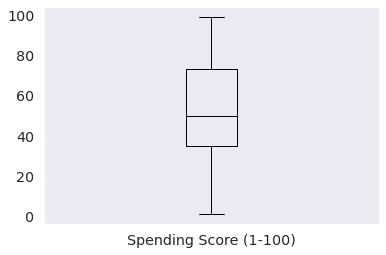

In [38]:
data.boxplot(column=['Spending Score (1-100)'], grid=False, color='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a335e6250>]],
      dtype=object)

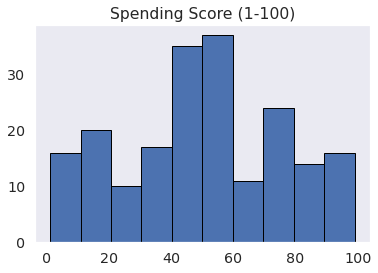

In [39]:
data.hist(column='Spending Score (1-100)', grid=False, edgecolor='black')

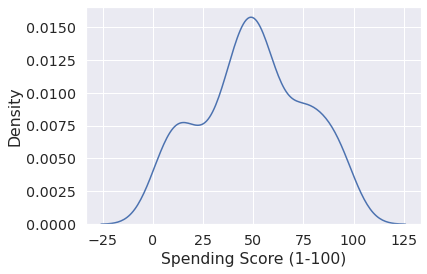

In [40]:
sns.kdeplot(data['Spending Score (1-100)'])

# Bi- Variate Analysis

Text(0, 0.5, 'Gender')

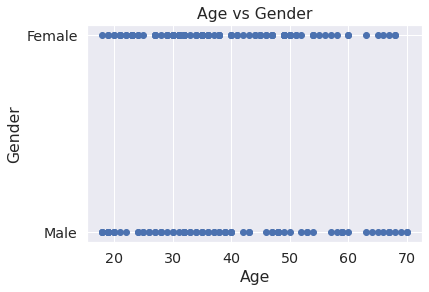

In [41]:
plt.scatter(data.Age, data.Gender)
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender')

In [42]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


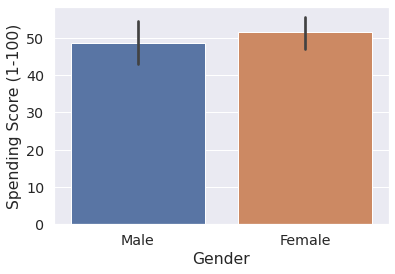

In [43]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=data)

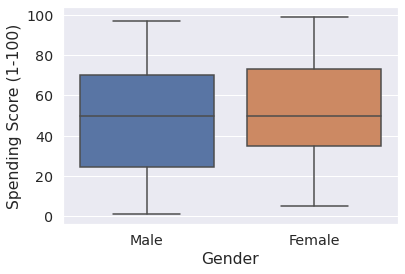

In [44]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=data)

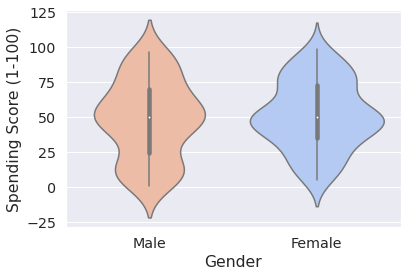

In [45]:
sns.violinplot(x='Gender',y='Spending Score (1-100)',data=data, palette='coolwarm_r')


# Multi-Variate Analysis

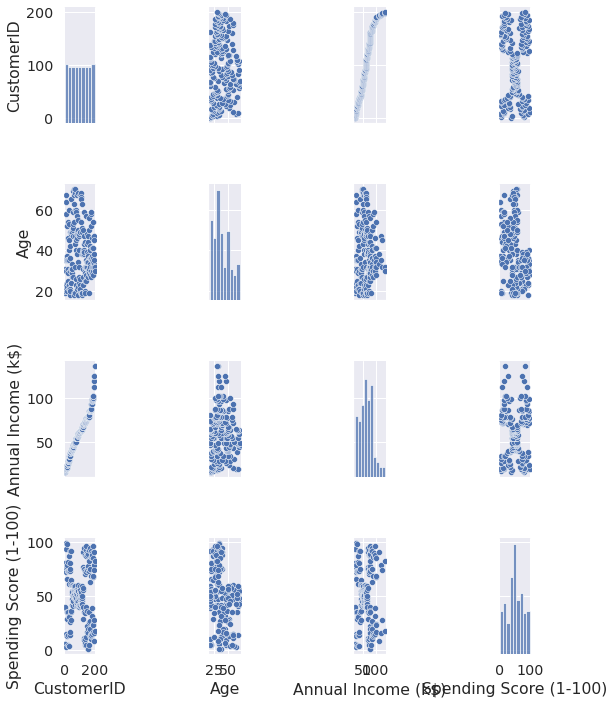

In [46]:
sns.pairplot(
    data=data, 
    aspect=.85);

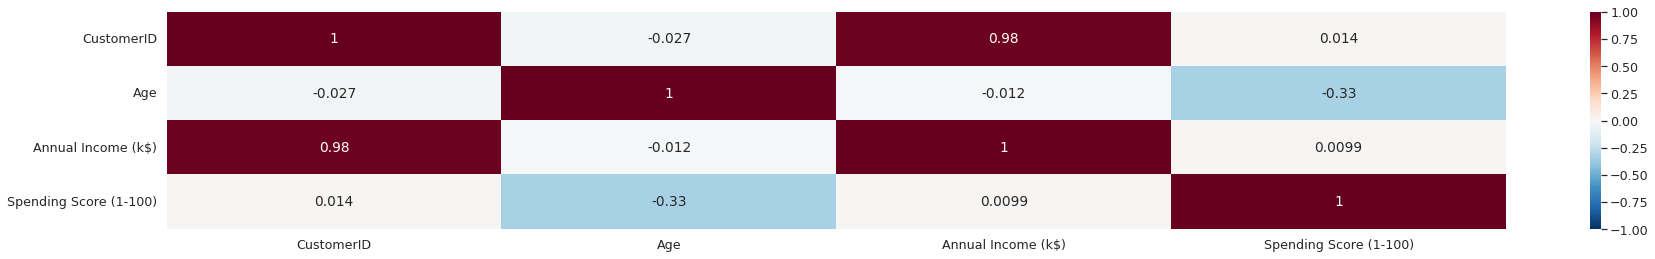

In [47]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,4))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Text(0, 0.5, 'Spending Score (1-100)')

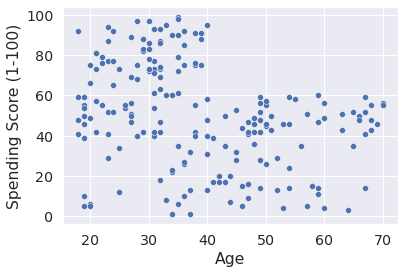

In [48]:
sns.set(font_scale=1.3)
sns.scatterplot(
  x='Age',y='Spending Score (1-100)',data=data)
plt.xlabel(
    'Age')
plt.ylabel(
    'Spending Score (1-100)')

# Descriptive statistics on the dataset

In [49]:
data['Spending Score (1-100)'].mean()

50.2

In [50]:
data['Spending Score (1-100)'].median()

50.0

In [51]:
data['Spending Score (1-100)'].std()

25.823521668370173

In [52]:
data['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

# Check for Missing values

In [53]:
data.isnull().sum().sum()

0

# Find the outliers and replace them outliers

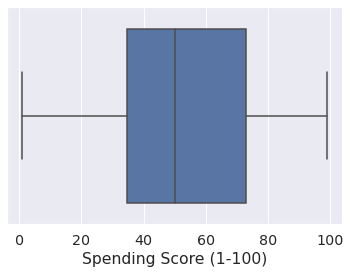

In [54]:
sns.boxplot(data['Spending Score (1-100)'],data=data)

In [55]:
data['Spending Score (1-100)'].skew()

-0.047220201374263374

In [56]:
Q1=data['Spending Score (1-100)'].quantile(0.25)
Q3=data['Spending Score (1-100)'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

38.25


In [57]:
Q1=data['Spending Score (1-100)'].quantile(0.25)
Q3=data['Spending Score (1-100)'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Spending Score (1-100)']=np.where((data['Spending Score (1-100)'])>upper_whisker,upper_whisker,np.where(data['Spending Score (1-100)']<lower_whisker,lower_whisker,data['Spending Score (1-100)']))

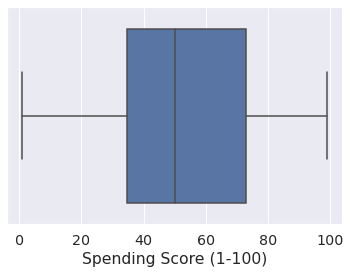

In [58]:
sns.boxplot(data['Spending Score (1-100)'],data=data)

# Check for Categorical columns and perform encoding

In [59]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [60]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [61]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

# Scaling the data

In [63]:
X = data.drop("Age",axis=1)
Y = data['Age']

In [64]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.73899919 -0.43480148]
 [-1.70609137  1.12815215 -1.73899919  1.19570407]
 [-1.68877065 -0.88640526 -1.70082976 -1.71591298]
 [-1.67144992 -0.88640526 -1.70082976  1.04041783]
 [-1.6541292  -0.88640526 -1.66266033 -0.39597992]
 [-1.63680847 -0.88640526 -1.66266033  1.00159627]
 [-1.61948775 -0.88640526 -1.62449091 -1.71591298]
 [-1.60216702 -0.88640526 -1.62449091  1.70038436]
 [-1.5848463   1.12815215 -1.58632148 -1.83237767]
 [-1.56752558 -0.88640526 -1.58632148  0.84631002]
 [-1.55020485  1.12815215 -1.58632148 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.58632148  1.89449216]
 [-1.5155634  -0.88640526 -1.54815205 -1.36651894]
 [-1.49824268 -0.88640526 -1.54815205  1.04041783]
 [-1.48092195  1.12815215 -1.54815205 -1.44416206]
 [-1.46360123  1.12815215 -1.54815205  1.11806095]
 [-1.4462805  -0.88640526 -1.50998262 -0.59008772]
 [-1.42895978  1.12815215 -1.50998262  0.61338066]
 [-1.41163905  1.12815215 -1.43364376 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [65]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.738999,-0.434801
1,-1.706091,1.128152,-1.738999,1.195704
2,-1.688771,-0.886405,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.700830,1.040418
4,-1.654129,-0.886405,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.268791,1.118061
196,1.671450,-0.886405,2.497807,-0.861839
197,1.688771,1.128152,2.497807,0.923953
198,1.706091,1.128152,2.917671,-1.250054


# Split the data into training and testing dataset

In [66]:
#train test split
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [67]:
X_train.shape

(160, 4)

In [68]:
X_test.shape

(40, 4)

In [69]:
Y_train.shape

(160,)

In [70]:
Y_test.shape

(40,)

# Split the data into dependent and independent variables

In [71]:
x = data.iloc[:, [3, 4]].values 

# Build the model using any of the clustering algorithms

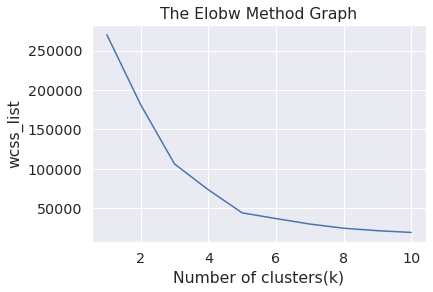

In [72]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# Train and test the model

In [73]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

# Add the cluster data with the primary dataset

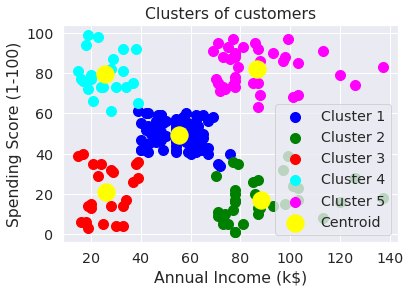

In [74]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 

# Measure the performance using evaluation metrics

In [75]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
sil_scores = []
calinski_score = []
davies_score = []
sil_scores.append(silhouette_score(x, y_predict))
calinski_score.append(calinski_harabasz_score(x, y_predict))
davies_score.append(davies_bouldin_score(x, y_predict))

In [76]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(x, y_predict))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, y_predict))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, y_predict))

Silhouette Coefficient: 0.554
Calinski-Harabasz Index: 247.359
Davies-Bouldin Index: 0.573
